<a href="https://colab.research.google.com/github/neginkarimi754/RNN_Sine_Wave/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
  

In [ ]:
x=np.linspace(0,50,501)

In [ ]:
#x

In [ ]:
y=np.sin(x)

In [ ]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

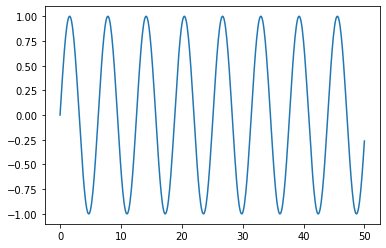

In [ ]:
plt.plot(x,y)

In [ ]:
df=pd.DataFrame(data=y,index=x,columns=['Sine'])

In [ ]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
test_percent=0.1

In [ ]:
len(df)*test_percent

50.1

In [ ]:
test_point=np.round(len(df)*test_percent)

In [ ]:
test_point

50.0

In [ ]:
test_ind=int(len(df)-test_point)

In [ ]:
train=df.iloc[:test_ind]     # first test_ind rows of dataframe     



In [ ]:
test=df.iloc[test_ind:]

In [ ]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#help(TimeseriesGenerator)

In [ ]:
length=2
bacht_size=1

generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=bacht_size)

In [ ]:
len(scaled_train)

451

In [ ]:
len(generator)

449

In [ ]:
X,y=generator[0]    # when choose length=2 means
                    # X  array([[[0.49999912],[0.54991622]]]) equal scaler_train[0]&scaler[1]
                    # y  array([[0.59933458]]) equal scaler_train[2]

In [ ]:
X        

array([[[0.49999912],
        [0.54991622]]])

In [ ]:
y

array([[0.59933458]])

In [ ]:
length=50
bacht_size=1

generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=bacht_size)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [ ]:
n_features=1

In [ ]:
model=Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=5)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
401/401 [==============================] - 4s 7ms/step - loss: 0.0241
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 2.3678e-05
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 2.3385e-04
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 1.5208e-04
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 8.6830e-05


In [ ]:
losses=pd.DataFrame(model.history.history)

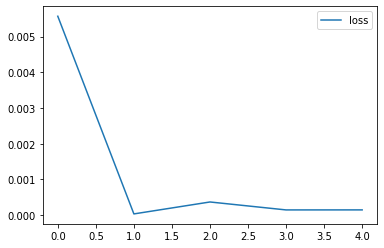

In [ ]:
losses.plot()

In [ ]:
first_eval_batch=scaled_train[-length:]
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [ ]:
first_eval_batch=first_eval_batch.reshape((1,length,n_features))
#first_eval_batch

In [ ]:

model.predict(first_eval_batch)

array([[0.9508603]], dtype=float32)

In [ ]:


scaled_test[0]

array([0.94955134])

In [ ]:
test_prediction=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

In [ ]:
#predicted_valu=[[[99]]]
#np.append(current_batch[:,1:,:],[[[99]]],axis=1)

In [ ]:
test_prediction=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred=model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_prediction

[array([0.9508603], dtype=float32),
 array([0.9668348], dtype=float32),
 array([0.9782829], dtype=float32),
 array([0.984665], dtype=float32),
 array([0.9849524], dtype=float32),
 array([0.98136663], dtype=float32),
 array([0.9728726], dtype=float32),
 array([0.9588664], dtype=float32),
 array([0.9399456], dtype=float32),
 array([0.91765934], dtype=float32),
 array([0.8915686], dtype=float32),
 array([0.86239886], dtype=float32),
 array([0.8310606], dtype=float32),
 array([0.7963048], dtype=float32),
 array([0.7596943], dtype=float32),
 array([0.7217632], dtype=float32),
 array([0.68208957], dtype=float32),
 array([0.6420948], dtype=float32),
 array([0.60208106], dtype=float32),
 array([0.5613996], dtype=float32),
 array([0.52071404], dtype=float32),
 array([0.48081806], dtype=float32),
 array([0.44179696], dtype=float32),
 array([0.4047486], dtype=float32),
 array([0.37011743], dtype=float32),
 array([0.33738145], dtype=float32),
 array([0.30739558], dtype=float32),
 array([0.28045833

In [ ]:
true_predictions=scaler.inverse_transform(test_prediction)

In [ ]:

test['prediction']=true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test

,Sine,prediction
45.1,0.899097,0.901715
45.2,0.938307,0.933664
45.3,0.968142,0.956560
45.4,0.988304,0.969324
45.5,0.998591,0.969899
45.6,0.998900,0.962727
45.7,0.989229,0.945739
45.8,0.969673,0.917727
45.9,0.940429,0.879886
46.0,0.901788,0.835314


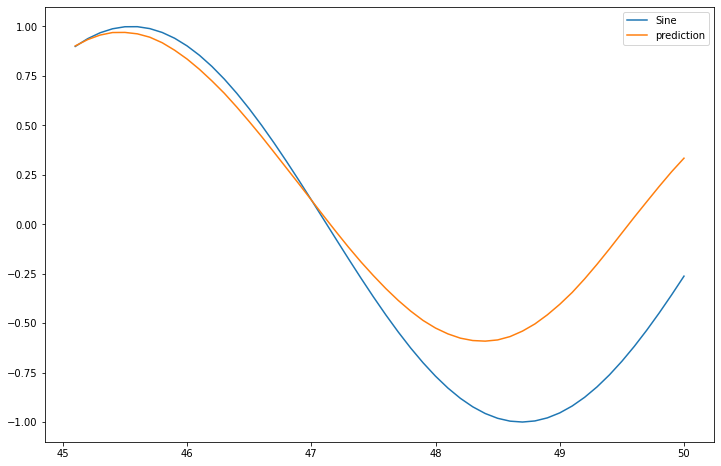

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
length=49
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
model=Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [ ]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stopping])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
402/402 [==============================] - 10s 21ms/step - loss: 0.0765 - val_loss: 1.7161e-04
Epoch 2/20
402/402 [==============================] - 8s 19ms/step - loss: 1.3397e-04 - val_loss: 2.3857e-04
Epoch 3/20
402/402 [==============================] - 8s 19ms/step - loss: 2.2096e-04 - val_loss: 6.6430e-06
Epoch 4/20
402/402 [==============================] - 8s 19ms/step - loss: 6.1938e-04 - val_loss: 5.9829e-07
Epoch 5/20
402/402 [==============================] - 8s 19ms/step - loss: 3.2510e-05 - val_loss: 1.3780e-05
Epoch 6/20
402/402 [==============================] - 8s 20ms/step - loss: 2.1392e-05 - val_loss: 3.0089e-05


In [ ]:
test_prediction=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred=model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


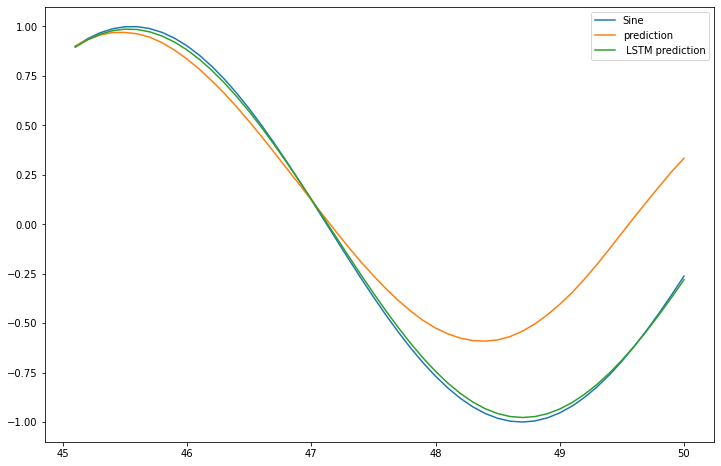

In [ ]:
true_predictions=scaler.inverse_transform(test_prediction)
test[' LSTM prediction']=true_predictions
test.plot(figsize=(12,8))

In [ ]:
forcast=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(25):

  current_pred=model.predict(current_batch)[0]
  forcast.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forcast=scaler.inverse_transform(forcast)

In [ ]:
forcast

array([[ 0.8949892 ],
       [ 0.93274332],
       [ 0.96069004],
       [ 0.97865569],
       [ 0.98659079],
       [ 0.98455281],
       [ 0.97270147],
       [ 0.95128999],
       [ 0.92065428],
       [ 0.88120192],
       [ 0.83340272],
       [ 0.77777856],
       [ 0.71489736],
       [ 0.64536898],
       [ 0.5698393 ],
       [ 0.48899173],
       [ 0.4035451 ],
       [ 0.31425448],
       [ 0.2219088 ],
       [ 0.12733355],
       [ 0.03138527],
       [-0.06504974],
       [-0.16106186],
       [-0.25572538],
       [-0.34810528]])

In [ ]:
25*0.1

2.5

In [ ]:
forcast_indx=np.arange(50.1,52.6,step=0.1)

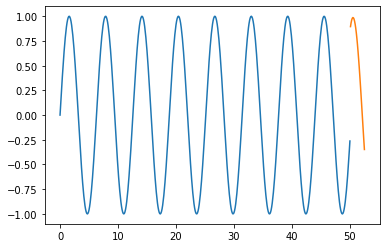

In [ ]:
plt.plot(df.index,df['Sine'])
plt.plot(forcast_indx,forcast)

19